In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
happy_df = pd.read_csv('../Data/Clean Data/HappynessCleanDataFinal.csv')
happy_df

,Country,Region,Happiness2015,GDP2015,Freedom2015,Generosity2015,Year2015,Corruption2015,Happiness2016,GDP2016,...,Freedom2020,Generosity2020,Year2020,Corruption2020,Happiness2021,GDP2021,Freedom2021,Generosity2021,Year2021,Corruption2021
0,Switzerland,Western Europe,7.587,1.39651,0.66557,0.29678,2015,0.41978,7.509,1.52733,...,0.921337,0.269056,2020,0.303728,7.571,1.566,0.919,0.204,2021,0.292
1,Iceland,Western Europe,7.561,1.30232,0.62877,0.43630,2015,0.14145,7.501,1.42666,...,0.948892,0.362330,2020,0.711710,7.554,1.482,0.955,0.293,2021,0.673
2,Denmark,Western Europe,7.527,1.32548,0.64938,0.34139,2015,0.48357,7.526,1.44178,...,0.951444,0.242793,2020,0.168489,7.620,1.502,0.946,0.208,2021,0.179
3,Norway,Western Europe,7.522,1.45900,0.66973,0.34699,2015,0.36503,7.498,1.57744,...,0.955750,0.287985,2020,0.263218,7.392,1.543,0.960,0.249,2021,0.270
4,Canada,North America,7.427,1.32629,0.63297,0.45811,2015,0.32957,7.404,1.44015,...,0.933913,0.281529,2020,0.390843,7.103,1.447,0.915,0.246,2021,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Afghanistan,Southern Asia,3.575,0.31982,0.23414,0.36510,2015,0.09719,3.360,0.38227,...,0.396573,0.135235,2020,0.933687,2.523,0.370,0.382,0.122,2021,0.924
132,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.59201,0.22628,2015,0.55191,3.515,0.32846,...,0.900589,0.235705,2020,0.183541,3.415,0.364,0.897,0.227,2021,0.167
133,Benin,Sub-Saharan Africa,3.340,0.28665,0.48450,0.18260,2015,0.08010,3.484,0.39499,...,0.735183,0.196670,2020,0.740533,5.045,0.507,0.757,0.166,2021,0.661
134,Burundi,Sub-Saharan Africa,2.905,0.01530,0.11850,0.19727,2015,0.10062,2.905,0.06831,...,0.626350,0.187402,2020,0.606935,3.775,0.000,0.626,0.172,2021,0.607


In [3]:
corruption = happy_df[['Country','Corruption2015', 'Corruption2016', 'Corruption2017',
                           'Corruption2018', 'Corruption2019', 'Corruption2020', 'Corruption2021' ]]
corruptionavg = corruption.mean(axis = 1 )
corruption.describe()

,Corruption2015,Corruption2016,Corruption2017,Corruption2018,Corruption2019,Corruption2020,Corruption2021
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,0.135862,0.131472,0.119477,0.110750,0.108243,0.731541,0.727809
std,0.115842,0.108447,0.100099,0.099187,0.097253,0.180326,0.182949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.109784,0.082000
25%,0.058960,0.054748,0.054846,0.049750,0.044250,0.684230,0.671500
50%,0.104525,0.095860,0.087698,0.080500,0.081000,0.784785,0.791500
75%,0.174025,0.172462,0.146166,0.133250,0.128500,0.848261,0.845750
max,0.551910,0.505210,0.464308,0.457000,0.453000,0.935585,0.939000


In [4]:
generosity = happy_df[['Country','Generosity2015', 'Generosity2016','Generosity2017',
                       'Generosity2018','Generosity2019','Generosity2020','Generosity2021']]
generosityavg = generosity.mean(axis = 1)

In [5]:
happiness = happy_df[['Country','Happiness2015','Happiness2016',
                      'Happiness2017','Happiness2018','Happiness2019','Happiness2020','Happiness2021']]


In [6]:
stats.ttest_ind(corruptionavg, generosityavg, equal_var = False)

Ttest_indResult(statistic=9.278119830516218, pvalue=1.431385473016657e-16)

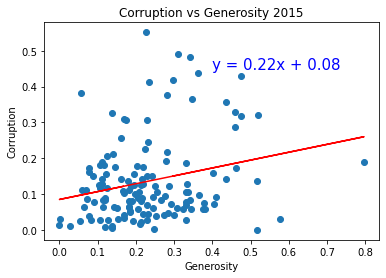

In [38]:

x_axis = generosity['Generosity2015']
y_axis = corruption['Corruption2015']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(.4,.45),fontsize=15,color="blue")
#Set plot points and plot the scatter
plt.xlabel('Generosity')
plt.ylabel('Corruption')
plt.title('Corruption vs Generosity 2015')
plt.scatter(x_axis,y_axis)

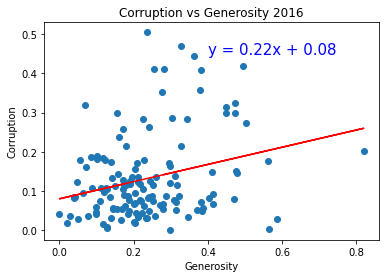

In [36]:
x_axis = generosity['Generosity2016']
y_axis = corruption['Corruption2016']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(.40,.45),fontsize=15,color="blue")
#Set plot points and plot the scatter
plt.xlabel('Generosity')
plt.ylabel('Corruption')
plt.title('Corruption vs Generosity 2016')
plt.scatter(x_axis,y_axis)

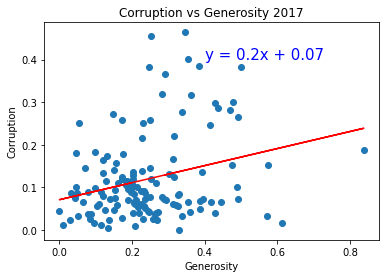

In [33]:
x_axis = generosity['Generosity2017']
y_axis = corruption['Corruption2017']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(.4,.4),fontsize=15,color="blue")
#Set plot points and plot the scatter
plt.xlabel('Generosity')
plt.ylabel('Corruption')
plt.title('Corruption vs Generosity 2017')
plt.scatter(x_axis,y_axis)

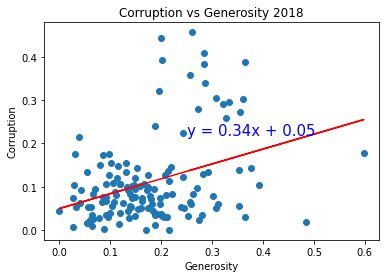

In [29]:
x_axis = generosity['Generosity2018']
y_axis = corruption['Corruption2018']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(.25,.22),fontsize=15,color="blue")
#Set plot points and plot the scatter
plt.xlabel('Generosity')
plt.ylabel('Corruption')
plt.title('Corruption vs Generosity 2018')
plt.scatter(x_axis,y_axis)

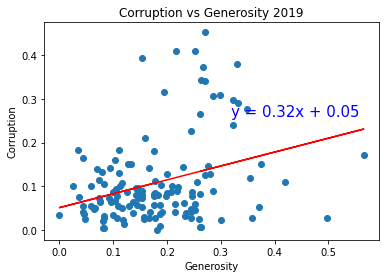

In [24]:
x_axis = generosity['Generosity2019']
y_axis = corruption['Corruption2019']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(.32,.26),fontsize=15,color="blue")

#Set plot points and plot the scatter
plt.xlabel('Generosity')
plt.ylabel('Corruption')
plt.title('Corruption vs Generosity 2019')
plt.scatter(x_axis,y_axis)

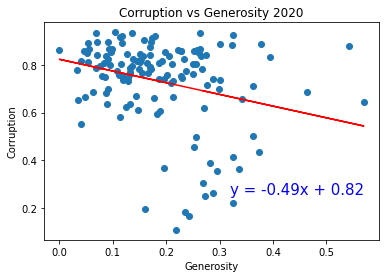

In [23]:
x_axis = generosity['Generosity2020']
y_axis = corruption['Corruption2020']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(.32,.26),fontsize=15,color="blue")

#Set plot points and plot the scatter
plt.xlabel('Generosity')
plt.ylabel('Corruption')
plt.title('Corruption vs Generosity 2020')
plt.scatter(x_axis,y_axis)

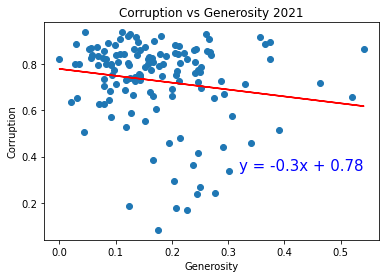

In [18]:
x_axis = generosity['Generosity2021']
y_axis = corruption['Corruption2021']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(.32,.34),fontsize=15,color="blue")

#Set plot points and plot the scatter
plt.xlabel('Generosity')
plt.ylabel('Corruption')
plt.title('Corruption vs Generosity 2021')
plt.scatter(x_axis,y_axis)

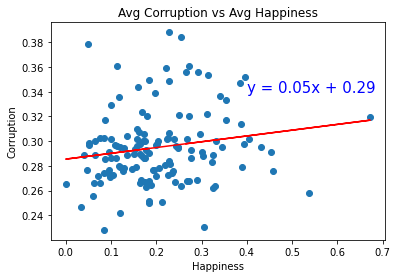

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(.4,.34),fontsize=15,color="blue")


x_axis = generosityavg
y_axis = corruptionavg
plt.xlabel('Happiness')
plt.ylabel('Corruption')
plt.title('Avg Corruption vs Avg Happiness')
plt.scatter(x_axis,y_axis)

